# Demonstration of Canopy Cover Calculation

Use a randomly generated image instead of an actual image of the canopy cover.
The `RandomState` object is a Pseudo Random Number Generator,
so the "random" numbers are repeatable.

FYI The `numpy` version of `randint` is exclusive, so you specify 0, 2.
If you were using the built in Python `random` then you would use 0, 1
because it is inclusive.

[[0 0 0 0 1 0 0 1 1]
 [1 1 0 1 0 0 0 1 0]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 1 0 1 1]]
Percentage canopy 22/45 = 0.49


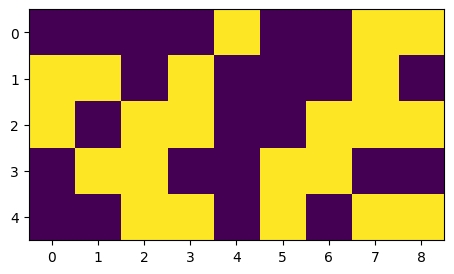

In [38]:
"""Create a dummy canopy image."""
import numpy
from matplotlib import pyplot
from numpy import random
from skimage import draw

PRNG = random.RandomState(seed=2024)  # The Pseudo Random Number Generator.
WIDTH = 5
HEIGHT = 9
CANOPY_IMAGE = PRNG.randint(0, 2, size=(WIDTH, HEIGHT))  # cols then rows 'cos it's an array.
print(CANOPY_IMAGE)

TOTAL_PIXELS = WIDTH * HEIGHT
CANOPY_PIXELS = numpy.sum(CANOPY_IMAGE)
PERCENTAGE_CANOPY = CANOPY_PIXELS / TOTAL_PIXELS
print(F"Percentage canopy {CANOPY_PIXELS}/{TOTAL_PIXELS} = {PERCENTAGE_CANOPY:.2f}")

figure, axes = pyplot.subplots(figsize=(8,3))
axes.imshow(CANOPY_IMAGE)

So what would a circle look like if it was in this array?

(np.float64(-0.5), np.float64(8.5), np.float64(4.5), np.float64(-0.5))

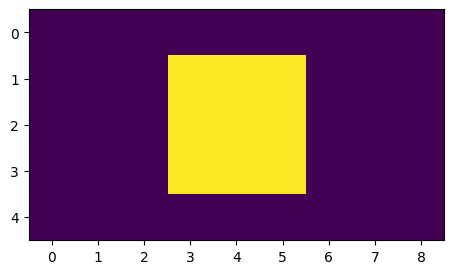

In [39]:
"""Create a circular mask."""
CANOPY_IMAGE_SHAPE = CANOPY_IMAGE.shape
ROWS = CANOPY_IMAGE_SHAPE[0]
COLUMNS = CANOPY_IMAGE_SHAPE[1]

SHORTEST_SIDE = min(ROWS, COLUMNS)
RADIUS = SHORTEST_SIDE // 2
CENTER_Y = ROWS // 2
CENTER_X = COLUMNS // 2

# Create a mask with a circle
CANOPY_IMAGE_MASK = numpy.zeros(CANOPY_IMAGE_SHAPE, dtype=bool)
rr, cc = draw.disk((CENTER_Y, CENTER_X), RADIUS, shape=(ROWS, COLUMNS))
CANOPY_IMAGE_MASK[rr, cc] = True

figure, axes = pyplot.subplots(figsize=(8,3))
axes.imshow(CANOPY_IMAGE_MASK)
axes.axis('on')

Okay it looks like a square because the resolution is so low.
If you ramp up the resolution it starts looking like a circle,
but the resolution is kept low so you can count the pixels
and confirm everything manually.